In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from platform import python_version

In [2]:
import tensorflow as tf

In [3]:
from keras.layers import Input, Embedding, Dense
from keras.layers.merge import concatenate
from keras.models import Model
from keras import backend as K
from keras import utils

Checking Requirements

In [4]:
print("The python version",python_version())
print("The TensorFLow version:", tf.__version__)

The python version 3.7.8
The TensorFLow version: 2.2.0


Import Necessary data

In [5]:
h1n1_train = pd.read_csv("h1n1_train.csv")

In [6]:
#h1n1_train.head()
h1n1_train.shape

(26707, 31)

In [7]:
seas_train = pd.read_csv("seas_train.csv")

In [8]:
#seas_train.head()
seas_train.shape

(26707, 29)

In [9]:
train_y = pd.read_csv("~/Desktop/flu_shot_learning/data/training_set_labels.csv")

In [10]:
# saving the target values for different viruses seperately
h1n1_y = train_y["h1n1_vaccine"]
seas_y = train_y["seasonal_vaccine"]

Writing necessary functions

In [11]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [12]:
def prepare_dataset(df, categ_cols):
    '''
    Function to prepare label encode data. 
    P.S: Reshape the returned vector before inputting it into the keras model
    
    df: The data frame that should be label encoded
    categ_cols: the categorical columns in df that must be label encoded
    '''
    df_encoded = list()
    # creating instance of labelencoder
    labelencoder = LabelEncoder()
    
    for col_name in categ_cols:
        encoded_col = labelencoder.fit_transform(df[col_name].astype(str))
        df_encoded.append(encoded_col)
    return df_encoded

In [13]:
def prepare_embeddings(df, categ_columns):
    in_layers = list()
    em_layers = list()
    
    for j in categ_columns:
        #calculate no. of unique values in this column
        embedding_input_size = len(df[j].unique())
        #define the input layer
        in_layer = Input(shape=(1,))
        
        #define embedding layer (default latent dimension is set to three)
        em_layer = Embedding(embedding_input_size, 2)(in_layer)
        
        #save each layers
        in_layers.append(in_layer)
        em_layers.append(em_layer)
        
    return in_layers, em_layers

Creating a model for H1N1 virus

In [14]:
# data prep
h1n1_x = prepare_dataset(h1n1_train, h1n1_train.columns.values)

In [15]:
# building the model 
K.clear_session()

h1n1_inputs, h1n1_embeddings = prepare_embeddings(h1n1_train, h1n1_train.columns.values)

h1n1_merge = concatenate(h1n1_embeddings)
h1n1_dense = Dense(10, activation='sigmoid')(h1n1_merge)
h1n1_output = Dense(1, activation='sigmoid')(h1n1_dense)
h1n1_model = Model(inputs = h1n1_inputs, outputs=h1n1_output)
h1n1_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

In [16]:
h1n1_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [17]:
h1n1_y = labelencoder.fit_transform(h1n1_y).reshape((len(h1n1_y), 1, 1))

In [18]:
# fit the keras model on the dataset
h1n1_model.fit(h1n1_x, h1n1_y, epochs=10, batch_size=16)

Epoch 1/10
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
1670/1670 [==============================] - 9s 5ms/step - loss: 0.3979 - auc: 0.8255
Epoch 2/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.3565 - auc: 0.8596
Epoch 3/10
1670/1670 [==============================] - 10s 6ms/step - loss: 0.3538 - auc: 0.8612
Epoch 4/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.3527 - auc: 0.8621
Epoch 5/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.3522 - auc: 0.8621
Epoch 6/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.3518 - auc: 0.8624
Epoch 7/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.3514 - auc: 0.8627
Epoch 8/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.3507 - auc: 0.8630
Epoch 9/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.3501 - auc: 0.8636
Epoch 10/10
1670/1670 [======================

In [19]:
K.clear_session()

Building a model for seasonal flu virus

In [20]:
# data prep
seas_x = prepare_dataset(seas_train, seas_train.columns.values)

In [21]:
# building the model 
K.clear_session()

seas_inputs, seas_embeddings = prepare_embeddings(seas_train, seas_train.columns.values)

seas_merge = concatenate(seas_embeddings)
seas_dense = Dense(10, activation='sigmoid')(seas_merge)
seas_output = Dense(1, activation='sigmoid')(seas_dense)
seas_model = Model(inputs = seas_inputs, outputs=seas_output)
seas_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

In [22]:
seas_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [23]:
seas_y = labelencoder.fit_transform(seas_y).reshape((len(seas_y), 1, 1))

In [24]:
# fit the keras model on the dataset
seas_model.fit(seas_x, seas_y, epochs=10, batch_size=16)

Epoch 1/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.5179 - auc: 0.8278
Epoch 2/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.4707 - auc: 0.8572
Epoch 3/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.4689 - auc: 0.8583
Epoch 4/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.4681 - auc: 0.8588
Epoch 5/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.4681 - auc: 0.8588
Epoch 6/10
1670/1670 [==============================] - 9s 6ms/step - loss: 0.4678 - auc: 0.8590
Epoch 7/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.4677 - auc: 0.8591
Epoch 8/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.4675 - auc: 0.8592A: 0s - loss: 0.4696 
Epoch 9/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.4675 - auc: 0.8592
Epoch 10/10
1670/1670 [==============================] - 9s 5ms/step - loss: 0.4670 - auc: 0.8595


In [25]:
K.clear_session()

Prediction based on models created

In [26]:
test_id = pd.read_csv("test_id.csv")

In [27]:
test_id.shape

(26708, 1)

H1N1 prediction

In [28]:
h1n1_test = pd.read_csv("h1n1_test.csv")
#h1n1_test.head()
h1n1_test.shape

(26708, 31)

In [29]:
# data prep
h1n1_test_input = prepare_dataset(h1n1_test, h1n1_test.columns.values)

In [30]:
h1n1_pred = h1n1_model.predict(h1n1_test_input)

In [31]:
print("min prediction:", h1n1_pred.min())
print("max prediction:", h1n1_pred.max())
print("avg prediction:", h1n1_pred.sum()/len(h1n1_pred))

min prediction: 0.012361318
max prediction: 0.92072684
avg prediction: 0.19364401071893253


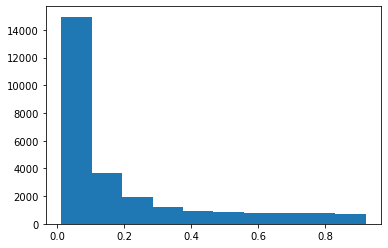

In [32]:
plt.hist(h1n1_pred[:,0,0], bins = 10)
plt.show()

Seasonal flu prediction

In [33]:
seas_test = pd.read_csv("seas_test.csv")
#seas_test.head()
seas_test.shape

(26708, 29)

In [34]:
# data prep
seas_test_input = prepare_dataset(seas_test, seas_test.columns.values)

In [35]:
seas_pred = seas_model.predict(seas_test_input)

In [36]:
print("min prediction:", seas_pred.min())
print("max prediction:", seas_pred.max())
print("avg prediction:", seas_pred.sum()/len(seas_pred))

min prediction: 0.03096801
max prediction: 0.9595793
avg prediction: 0.4532509644231129


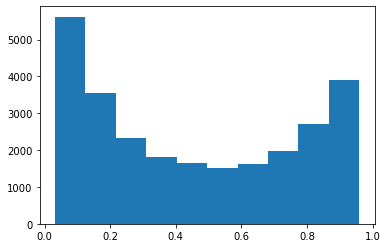

In [37]:
plt.hist(seas_pred[:,0,0], bins = 10)
plt.show()

Make the submission file with predictions

In [38]:
submission = pd.DataFrame({
    "respondent_id": test_id['x']
})

In [39]:
submission["h1n1_vaccine"] = h1n1_pred[:,0,0]

submission["seasonal_vaccine"] = seas_pred[:,0,0]

In [40]:
submission.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.081923,0.297051
1,26708,0.026040,0.045982
2,26709,0.205296,0.608338
3,26710,0.441611,0.854460
4,26711,0.224729,0.476213


In [41]:
submission.to_csv("submission_5_embedded_sigmoids.csv", index = False)